In [1]:
import gzip

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [16]:
data = pd.read_csv(gzip.open('./anomaly-detection-data/taxi_tripcount_per_hour_7yrs.csv.gz'),                  
                  parse_dates={"Datetime" : [0,1,2,3]},
                  date_parser=lambda x: pd.datetime.strptime(x, '%Y %m %d %H'),
                  index_col='Datetime')
# print data.head()
# print '\n Data Types:'
# print data.dtypes

In [17]:
print(data.dtypes)

Weekday    int64
Count      int64
dtype: object


In [22]:
ts = data['Count']

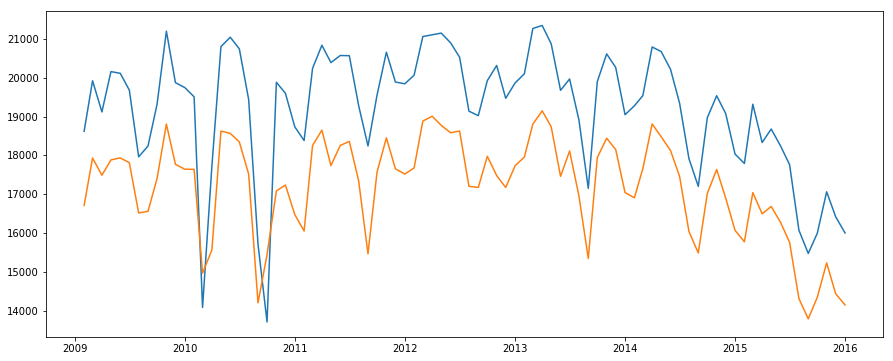

In [54]:
plt.plot(ts.groupby(pd.TimeGrouper('M')).median(),label='median')
plt.plot(ts.groupby(pd.TimeGrouper('M')).mean(),label='mean')

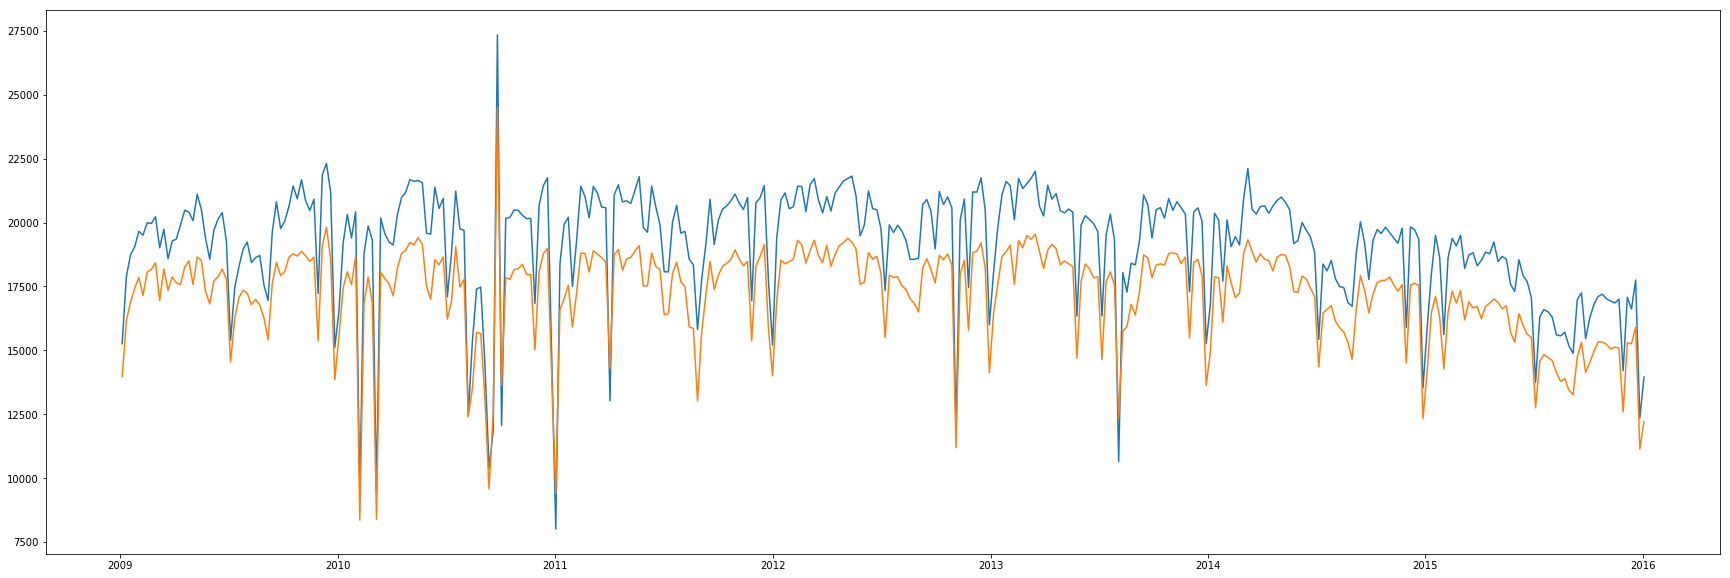

In [67]:
rcParams['figure.figsize'] = 30, 10
plt.plot(ts.groupby(pd.TimeGrouper('W')).median(),label='median')
plt.plot(ts.groupby(pd.TimeGrouper('W')).mean(),label='mean')

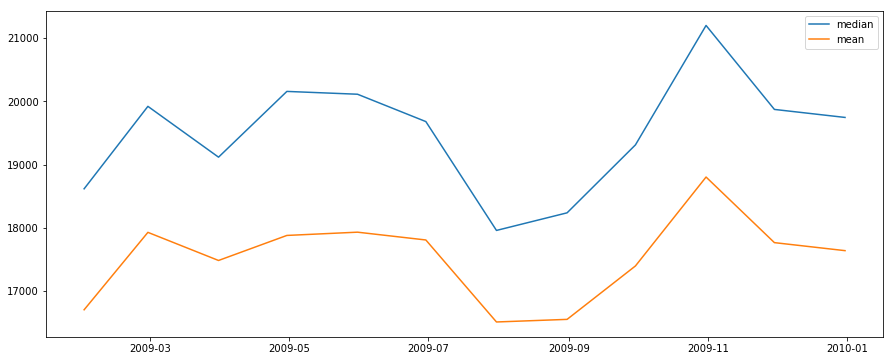

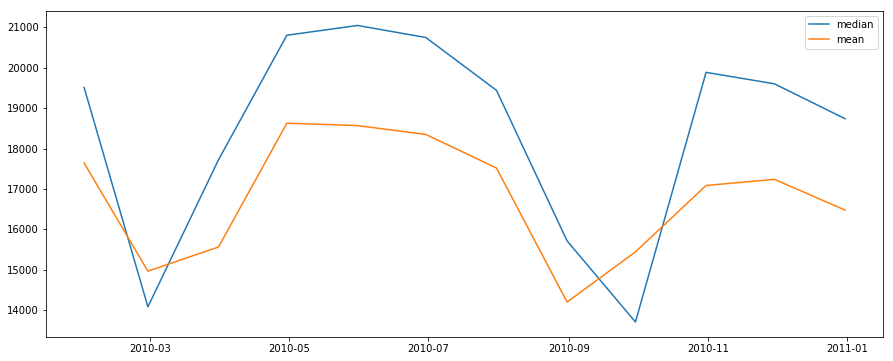

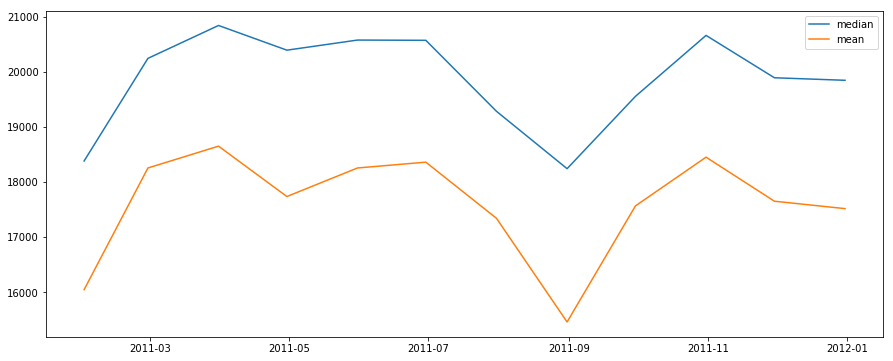

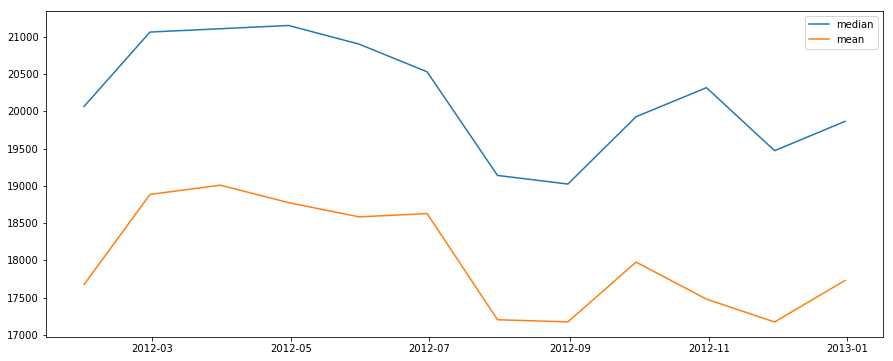

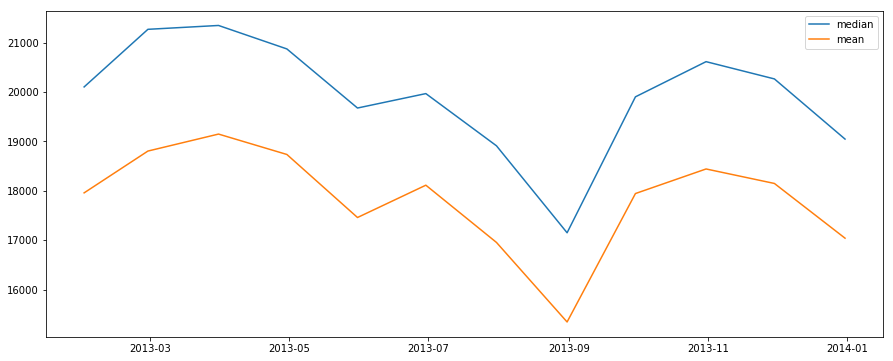

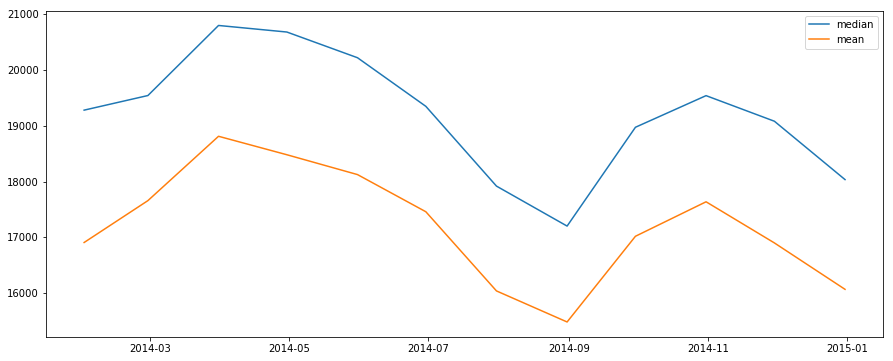

In [53]:
for y in ['2009','2010','2011','2012','2013','2014']:
    plt.plot(ts[y].groupby(pd.TimeGrouper('M')).median(),label='median')
    plt.plot(ts[y].groupby(pd.TimeGrouper('M')).mean(),label='mean')
    plt.legend()
    plt.show()

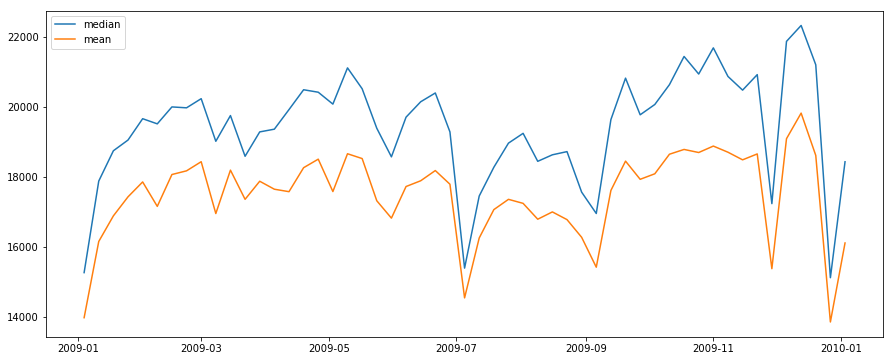

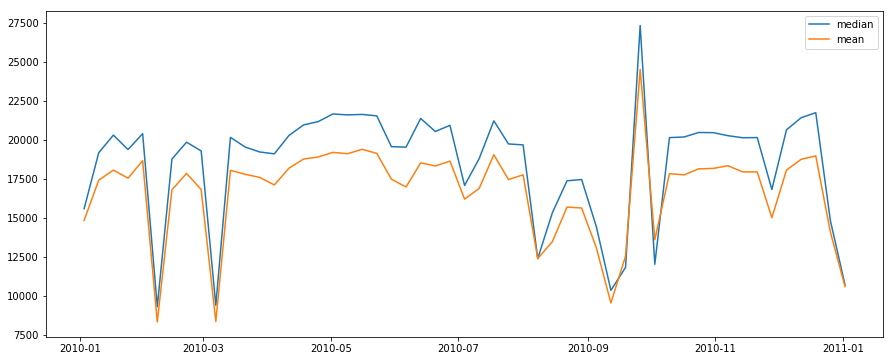

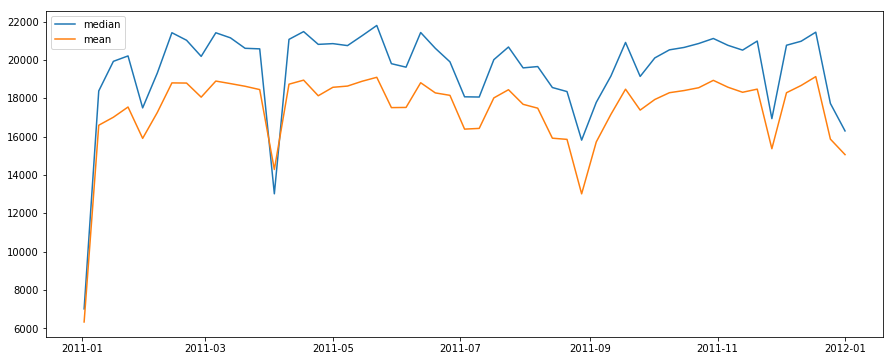

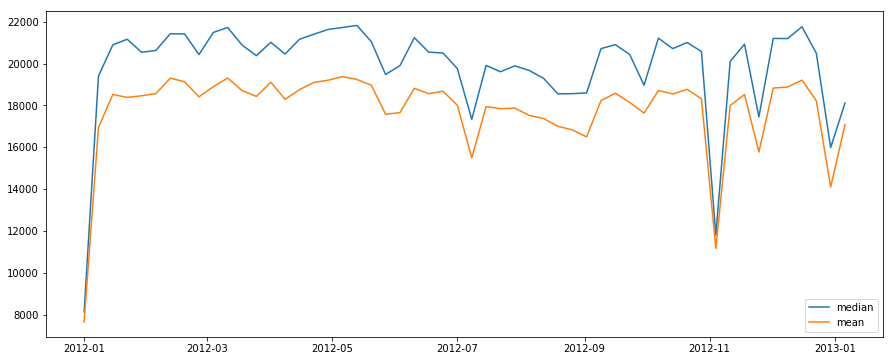

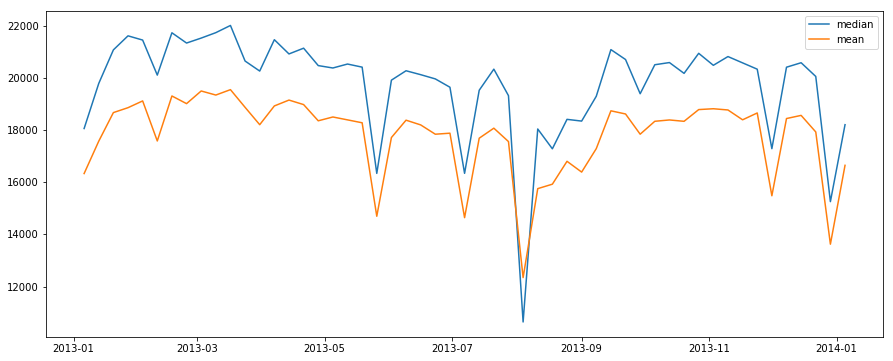

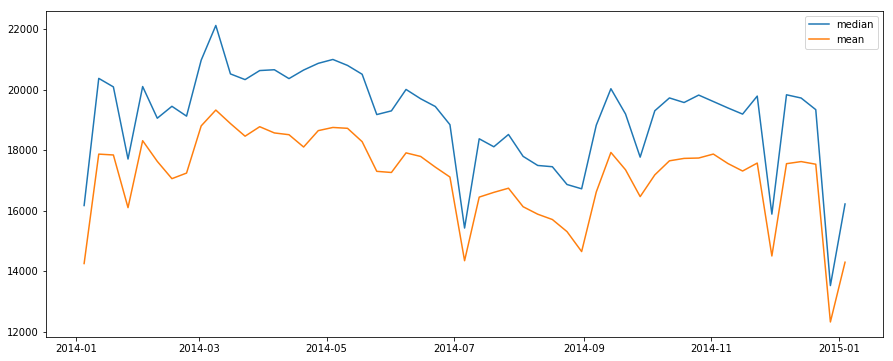

In [55]:
for y in ['2009','2010','2011','2012','2013','2014']:
    plt.plot(ts[y].groupby(pd.TimeGrouper('W')).median(),label='median')
    plt.plot(ts[y].groupby(pd.TimeGrouper('W')).mean(),label='mean')
    plt.legend()
    plt.show()

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
  """


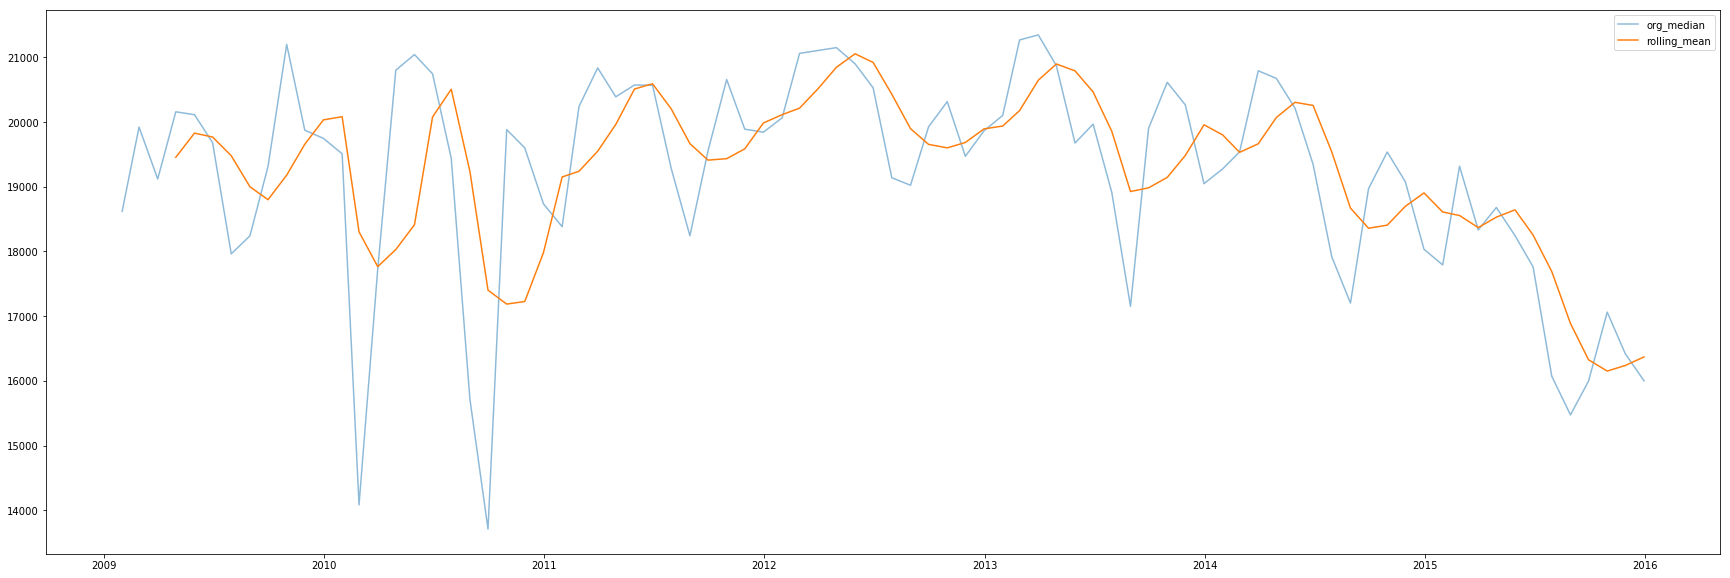

In [68]:
#Check stationary 
#Rolling mean:
plt.plot(ts.groupby(pd.TimeGrouper('M')).median(),alpha=.5,label='org_median')
plt.plot(
    pd.rolling_mean(ts.groupby(pd.TimeGrouper('M')).median(),window=4),
    label='rolling_mean')
# plt.plot(
#     pd.rolling_std(ts.groupby(pd.TimeGrouper('M')).median(),window=4),
#     label='rolling_std')
plt.legend()
plt.show()


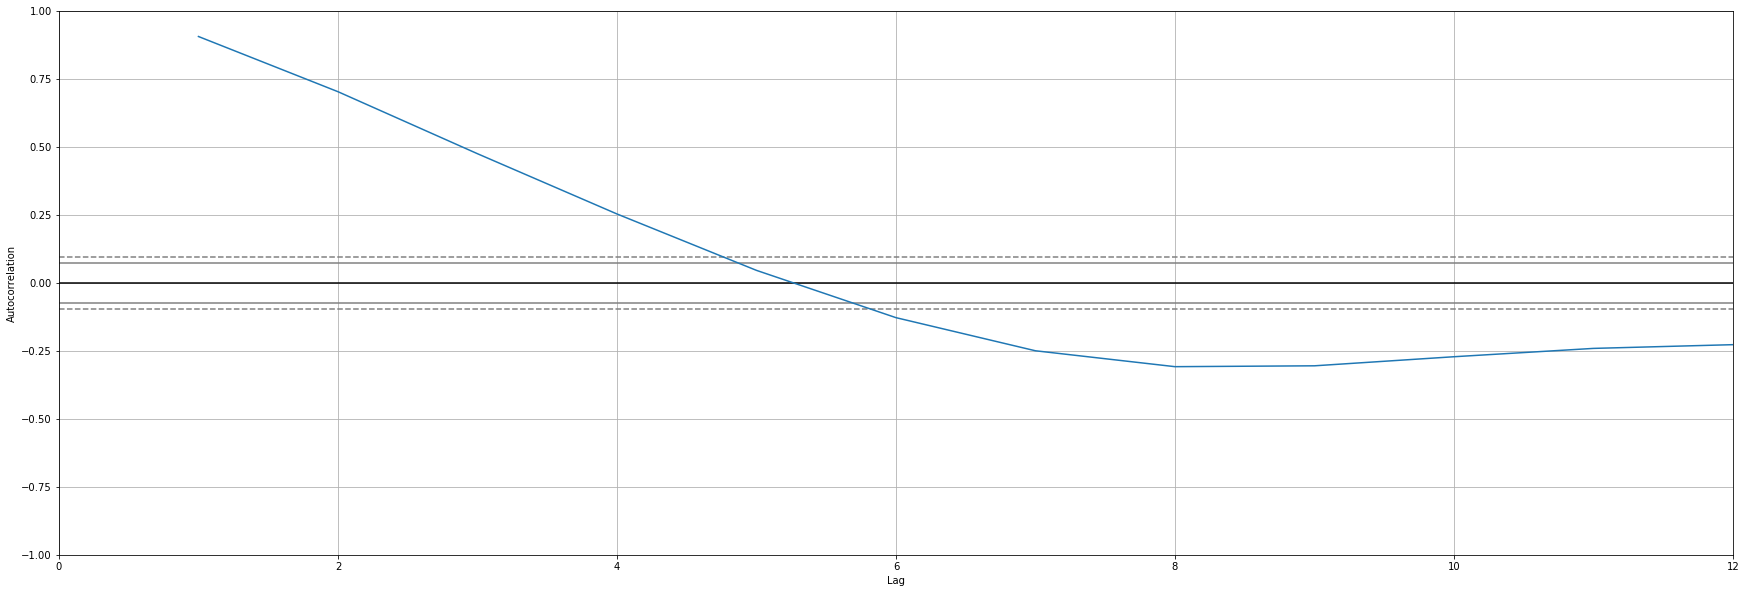

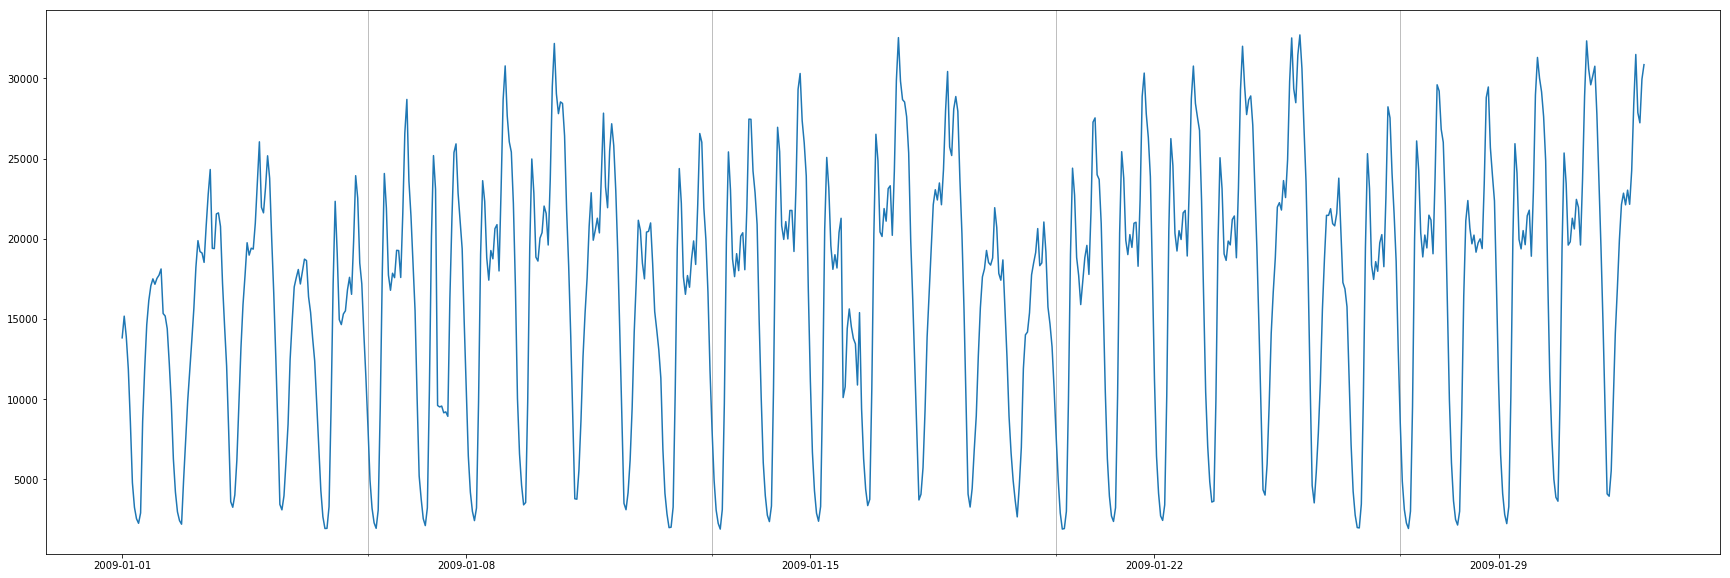

Std. 8104.20866008


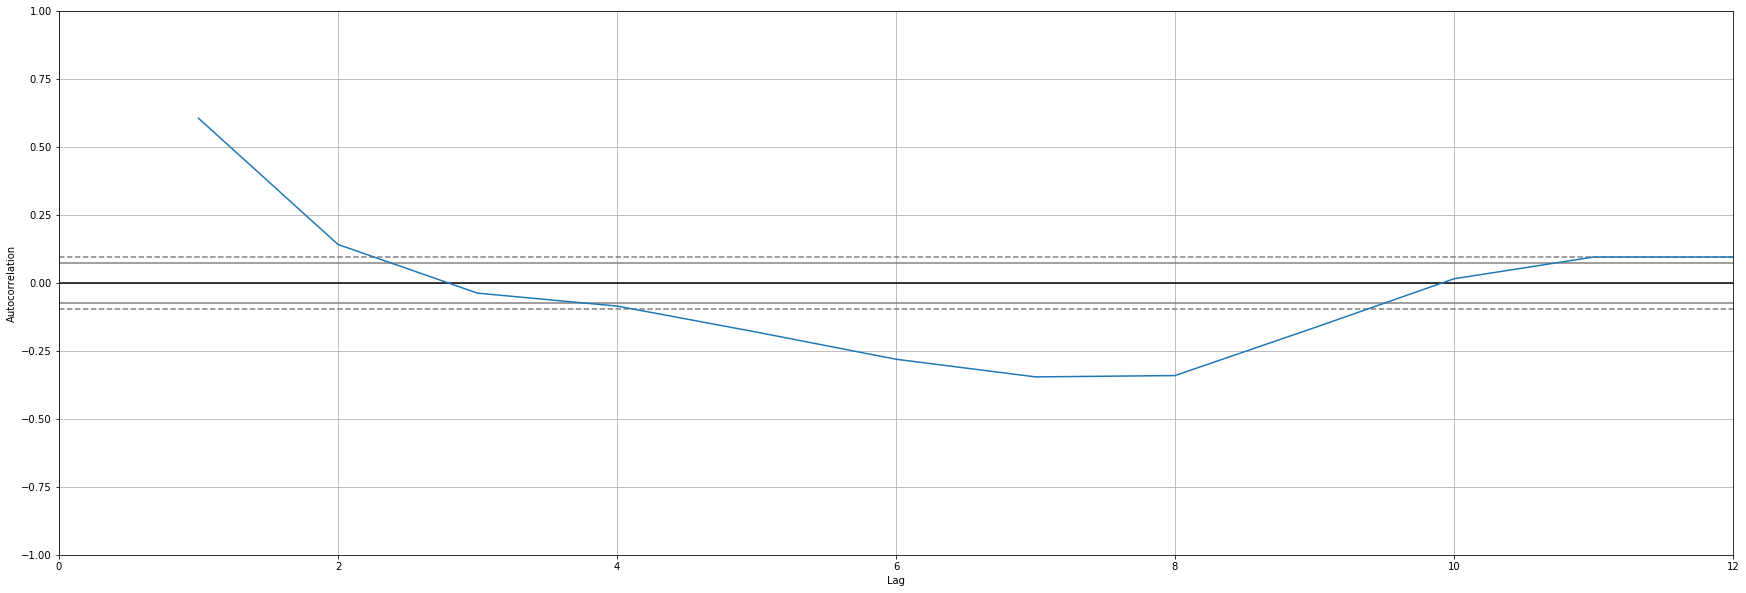

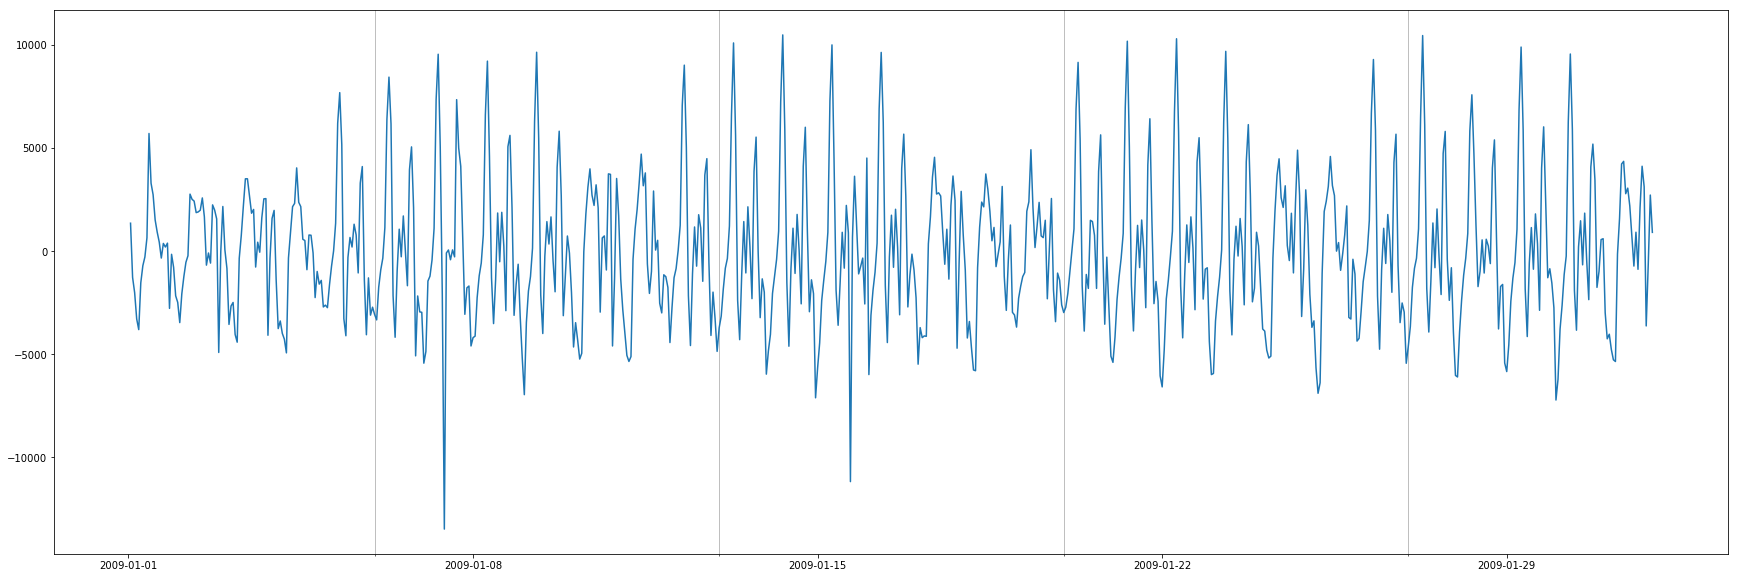

Std. 3458.8344202


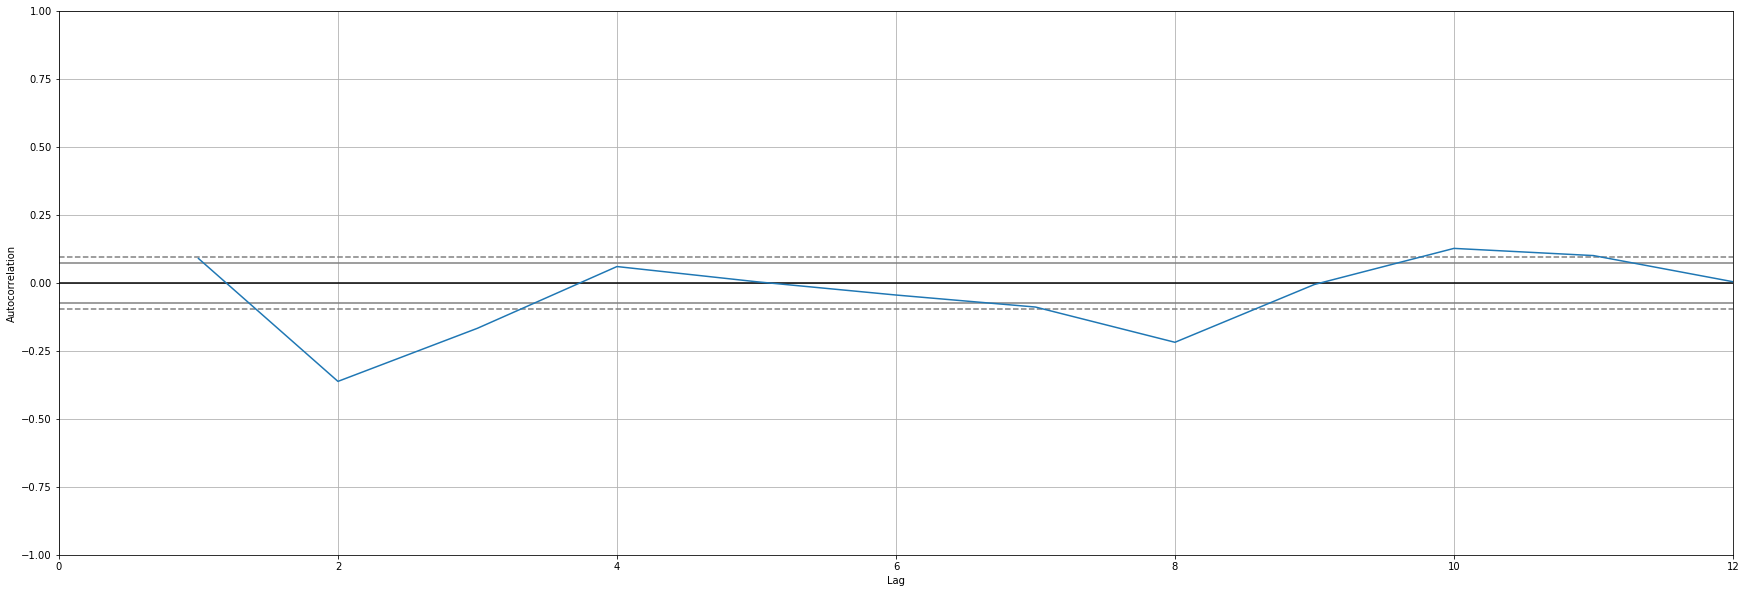

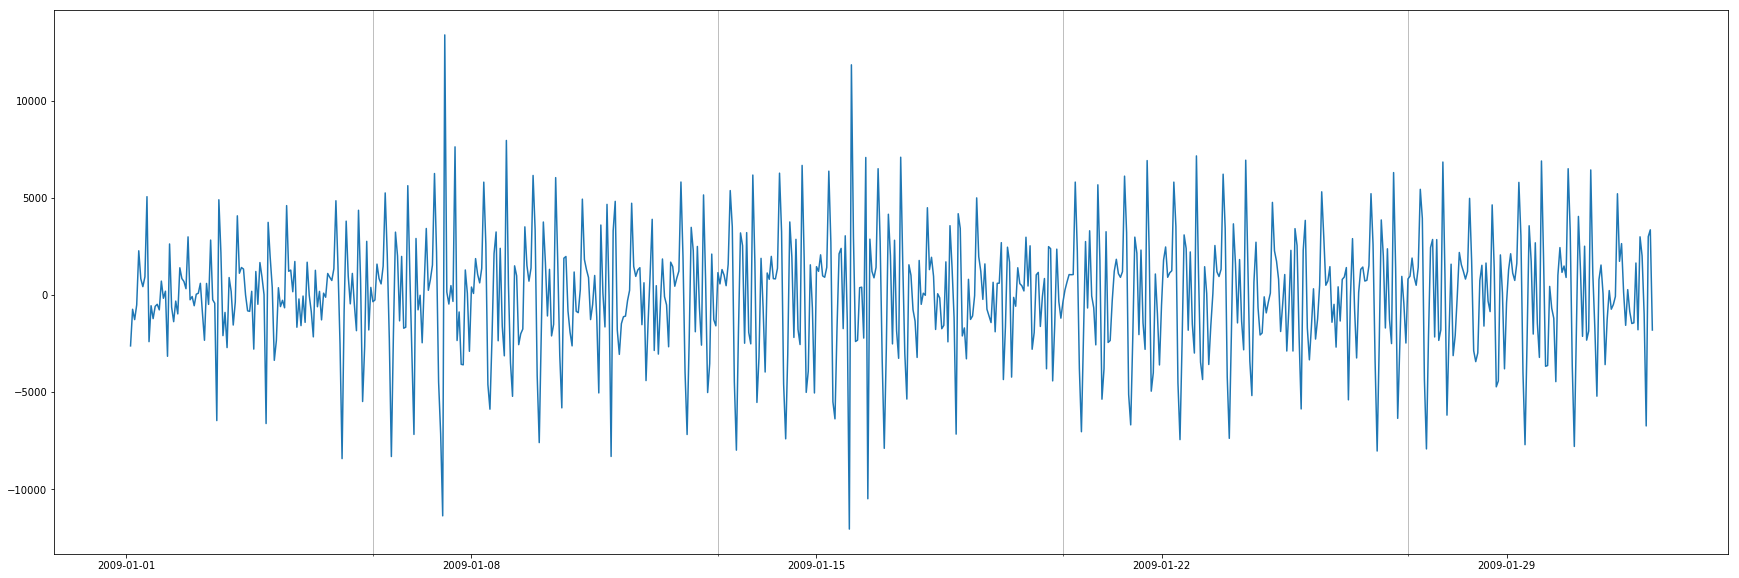

Std. 3070.61940254


In [147]:
#ARIMA:
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

import matplotlib.dates as dates
def plot_arima(ts):
    #plt.plot(ts)

    autocorrelation_plot(ts)
    plt.xlim(0,12)
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(ts)
    ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),interval=1))
    ax.xaxis.grid(True,which="minor")
    plt.show()

    diff_level = 2
    diff = ts
    for i in range(1,diff_level+1):
        diff = (diff - diff.shift(1))[1:]
        autocorrelation_plot(diff)
        plt.xlim(0,12)
        plt.show()
        
        fig, ax = plt.subplots()
        ax.plot(diff)
        ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),interval=1))
        ax.xaxis.grid(True,which="minor")
        plt.show()
    
idx ='2009-01'
plot_arima(ts[idx])

# plt.plot(ts[idx])
# plt.show()
# autocorrelation_plot(ts[idx])
# plt.show()

In [129]:
model = ARIMA(ts[idx].astype(np.float64),order=(0,1,0))

In [130]:
model_fit = model.fit()

In [133]:
model_fit.data